# Supervised Learning — How to do a logistic regression in Python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## When can logistic regression be used?

- When the response variable (the one being predicted) is binary or categorical.
- When the observations are independent.

## Which packages can be used for performing logistic regression?

- scikit-learn (used here)
- statsmodels
- PyCaret, TensorFlow, Keras, PyTorch

## Case study: predicting organic product purchases

A supermarket provided coupons incentivizing buying organic products to its loyalty program members, and recorded whether or not they actually bought any.

We'll need **pandas** for importing the data and doing some manipulation, then modeling with **scikit-learn**.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The dataset is imported from a CSV file named `"organics.csv"`.

In [3]:
organic = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/organics.csv')

## Data dictionary

Each row corresponds to one character in a slash movie.

- **Gender**: gender of the customer; either **M** (male), **F** (female), **U** (unknown).
- **Geographic Region**: where in the UK was the customer based; **North**, **Midlands**, **South East**, **South West**, **Scottish**.
- **Loyalty Status**: what type of loyalty card did the customer have? **Tin**, **Silver**, **Gold**, or **Platinum**.
- **Affluence**: how well off does the supermarket estimate the customer is?
- **Age**: how old was the customer in years?
- **Purchased Organics**: did they purchase an organic product? **0** (no), or **1** (yes).

## Converting categorical columns to dummy variables

Scikit-learn can't deal with categorical columns directly. They must be converted to dummy columns of ones and zeroes. The pandas function [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) can be used for this.

In [4]:
# Print some records of the data
organic.head(10)

,Gender,Geographic Region,Loyalty Status,Affluence,Age,Purchased Organics
0,Unknown,Midlands,Gold,10.0,76.0,0
1,Unknown,Midlands,Gold,4.0,49.0,0
2,Female,Midlands,Silver,5.0,70.0,1
3,Male,Midlands,Tin,10.0,65.0,1
4,Female,Midlands,Tin,11.0,68.0,0
5,Unknown,North,Platinum,9.0,72.0,0
6,Female,Midlands,Tin,11.0,74.0,0
7,Male,North,Tin,13.0,62.0,0
8,Male,Midlands,Silver,10.0,62.0,0
9,Female,North,Gold,7.0,60.0,0


In [5]:
# Check type of the data
organic.dtypes


Gender                 object
Geographic Region      object
Loyalty Status         object
Affluence             float64
Age                   float64
Purchased Organics      int64
dtype: object

In [ ]:
# Check null values
organic.isnull().sum()

Gender                0
Geographic Region     0
Loyalty Status        0
Affluence             0
Age                   0
Purchased Organics    0
dtype: int64

In [6]:
dummies_gender = pd.get_dummies(organic['Gender'])
dummies_geo = pd.get_dummies(organic['Geographic Region'])
dummies_loyal = pd.get_dummies(organic['Loyalty Status'])

merged_dummies_variable = pd.concat([organic, dummies_gender, dummies_geo, dummies_loyal], axis=1)
organic = merged_dummies_variable.drop(columns=['Gender', 'Geographic Region', 'Loyalty Status'])

In [7]:
organic.head(10)

,Affluence,Age,Purchased Organics,Female,Male,Unknown,Midlands,North,Scottish,South East,South West,Gold,Platinum,Silver,Tin
0,10.0,76.0,0,False,False,True,True,False,False,False,False,True,False,False,False
1,4.0,49.0,0,False,False,True,True,False,False,False,False,True,False,False,False
2,5.0,70.0,1,True,False,False,True,False,False,False,False,False,False,True,False
3,10.0,65.0,1,False,True,False,True,False,False,False,False,False,False,False,True
4,11.0,68.0,0,True,False,False,True,False,False,False,False,False,False,False,True
5,9.0,72.0,0,False,False,True,False,True,False,False,False,False,True,False,False
6,11.0,74.0,0,True,False,False,True,False,False,False,False,False,False,False,True
7,13.0,62.0,0,False,True,False,False,True,False,False,False,False,False,False,True
8,10.0,62.0,0,False,True,False,True,False,False,False,False,False,False,True,False
9,7.0,60.0,0,True,False,False,False,True,False,False,False,True,False,False,False


## Splitting into response and explanatory columns

The response column is `"Purchased Organics"`. The explanatory (input) columns are all the other columns.

In [8]:
y = organic['Purchased Organics']
X = organic.drop(columns=['Purchased Organics'])

## Splitting into training and testing sets

The explanatory and response datasets need to be split into training and testing sets.

Here we'll use [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with the default arguments.

In [9]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

## Fitting the model to the training set

The data is now ready to model. The first modeling step is to create a `LogisticRegression` object.

Note that scikit-learn uses regularization (a technique for minimizing the effect of less important parameters) by default. This is a controversial default, so to use standard logistic regression, you need to set `penalty="none"`.

In [10]:
lr = LogisticRegression(penalty=None, max_iter=100000) # you can change any hyperparameters

Use the [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) method to fit the model to the training set.

In [11]:
model = lr.fit(XTrain, yTrain)

## Making predictions on the testing set

You can calculate the predicted response with the [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?#sklearn.linear_model.LogisticRegression.predict) method.

In [12]:
y_pred = lr.predict(XTest)

## Assessing model performance

Choose any metrics of your interest

In [13]:
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2544
           1       0.72      0.40      0.52       881

    accuracy                           0.81      3425
   macro avg       0.77      0.67      0.70      3425
weighted avg       0.80      0.81      0.79      3425



[`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) prints a lot of metrics about the performance of the model. There are five numbers we typically care about.

```
                   precision          recall                         f1-score   support

           0  TN / (TN + FN)  TN / (TN + FP)            2TP/ (2TP + FN + FP)
                  
           1  TP / (TP + FP)  TP / (TP + FN)                                 .        .

    accuracy                                   (TN + TP) / (TN + TP + FN + FP)        .
   macro avg (Precision0 + Precision1) / 2   (Recall0 + Recall1) / 2    (F1_Score0 + F1_Score1) / 2        .
weighted avg   (TN * Precision0 + TP * Precision1)/ (Support0 + Support1)  (TN * Recall0 + TP * Recall1)/ (Support0 + Support1)  (TN * F1_Score0 + TP * F1_Score1)/ (Support0 + Support1)        .
```

- **Accuracy**: What fraction of the values were correctly predicted? => 0.81
- **Precision 0**: What fraction of the values that were predicted to be negative actually were negative? 0.82
- **Precision 1**: What fraction of the values that were predicted to be positive actually were positive? 0.72
- **Recall 0** a.k.a. **specificity**: What fraction of the values that were actually negative were predicted to be negative? TN/ (TN + FP) = 0.95
- **Recall 1** a.k.a. **sensitivity**: What fraction of the values that were actually positive were predicted to be positive? TP/ (TP + FN) = 0.4

## Improve the model with feature selection or GridsearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
logreg = LogisticRegression(max_iter=10000, solver='liblinear')
logreg_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = 10, scoring='accuracy')
logreg_cv.fit(XTrain, yTrain)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l1'}
accuracy : 0.801927081944837


In [16]:
# Define the logistic model with tuned hyperparameters # C=0.01, penalty='l1',  solver='liblinear', max_iter=10000
lr_tuned = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', max_iter=10000)
model_tuned = lr_tuned.fit(XTrain, yTrain)
y_tuned_pred = lr_tuned.predict(XTest)

print(classification_report(yTest, y_tuned_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2544
           1       0.73      0.42      0.53       881

    accuracy                           0.81      3425
   macro avg       0.78      0.68      0.71      3425
weighted avg       0.80      0.81      0.79      3425



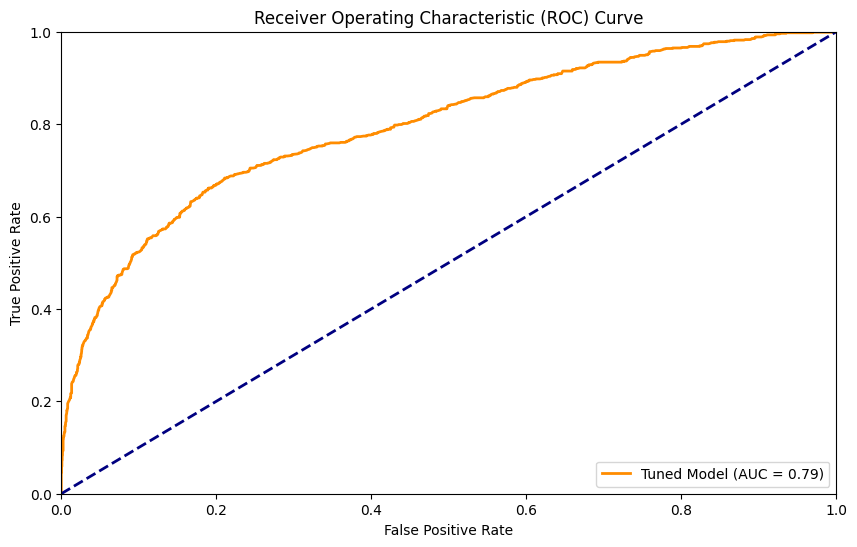

In [17]:
# Plot ROC
# Calculate the predicted probabilities for the positive class
y_tuned_pred_prob = model_tuned.predict_proba(XTest)[:, 1]

# Compute the false positive rate (FPR) and true positive rate (TPR)
fpr_tuned, tpr_tuned, thresh_tuned = roc_curve(yTest, y_tuned_pred_prob)

# Calculate the area under the curve (AUC)
roc_auc_tuned = roc_auc_score(yTest, y_tuned_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label='Tuned Model (AUC = %0.2f)' % roc_auc_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()